In [6]:
import os
# os.chdir("../../../src")

import random
from data import PolygonSentenceReader, Polygon
import matplotlib.pyplot as plt
from utils import plot_polygon
from shapely import Polygon as ShapelyPolygon

In [9]:
def test_visualise_composition(reader, operation_type='union', num_samples=3):
    """
    Visualise a few examples of boolean composition (union or intersection) of two polygons.

    For each sample, plots three subplots side-by-side:
      1. Polygon 1
      2. Polygon 2
      3. Result of the boolean operation
    """
    for i in range(num_samples):
        # Generate two random convex polygons
        p1 = reader.generate_polygon()
        p2 = reader.generate_polygon()

        # Create Shapely objects
        sp1 = ShapelyPolygon(p1.vertices)
        sp2 = ShapelyPolygon(p2.vertices)

        # Perform the operation
        if operation_type == 'union':
            sc_shape = sp1.union(sp2)
        elif operation_type == 'intersection':
            sc_shape = sp1.intersection(sp2)
        else:
            raise ValueError(f"Unknown operation: {operation_type}")

        # Ensure we have a valid single polygon
        if sc_shape.is_empty or not sc_shape.is_valid or sc_shape.geom_type != 'Polygon':
            print(f"Sample {i}: invalid result, skipping")
            continue

        # Extract composed polygon vertices
        coords_sc = list(sc_shape.exterior.coords)[:-1]
        comp_vertices = [(x, y) for x, y in coords_sc]

        # Plot
        plt.figure(figsize=(18, 6))

        plot_polygon(p1.vertices, title=f"P1 (n={p1.n})")

        plot_polygon(p2.vertices, title=f"P2 (n={p2.n})")

        plot_polygon(comp_vertices, title=f"{operation_type.title()} (n={len(comp_vertices)})")

# Union

<Figure size 1800x600 with 0 Axes>

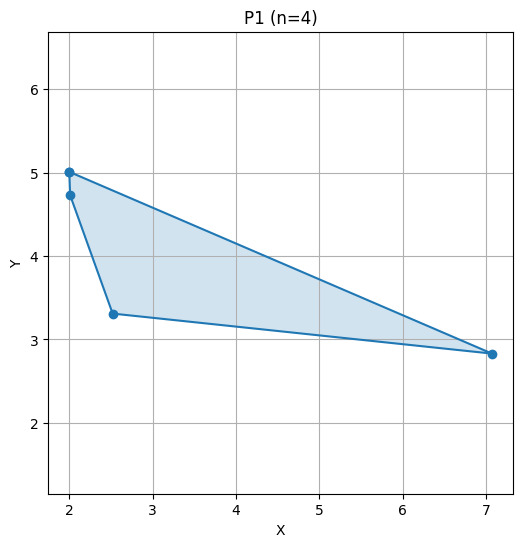

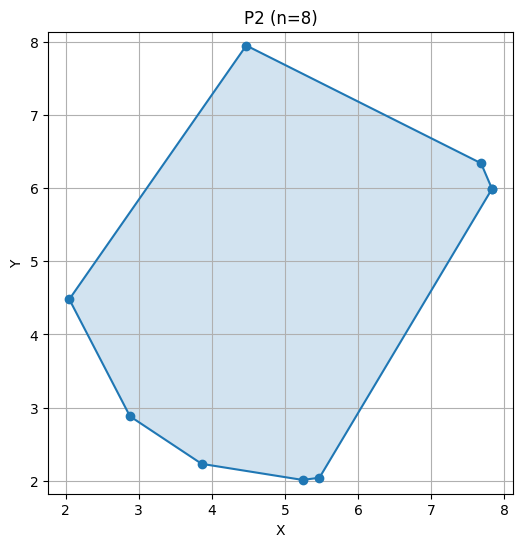

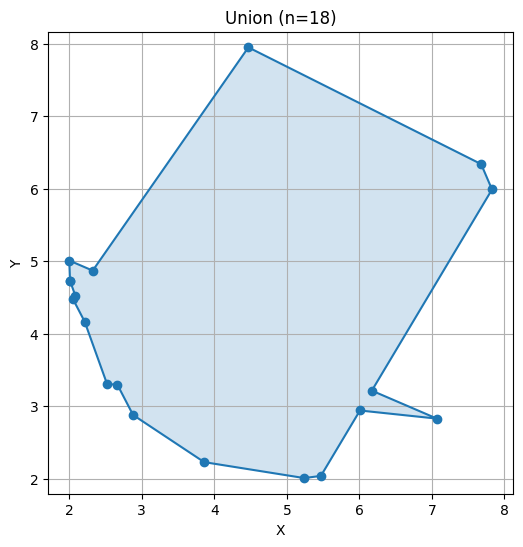

<Figure size 1800x600 with 0 Axes>

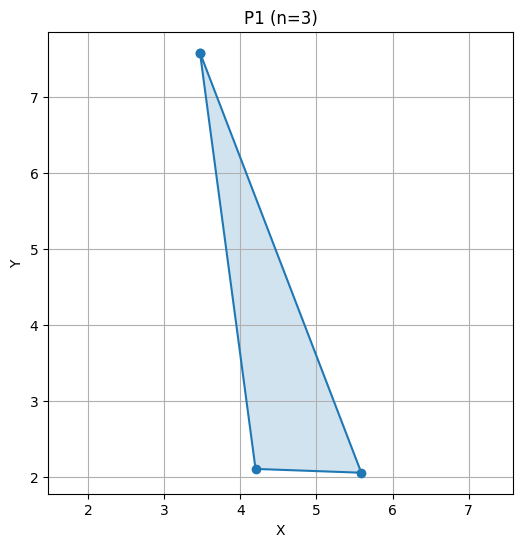

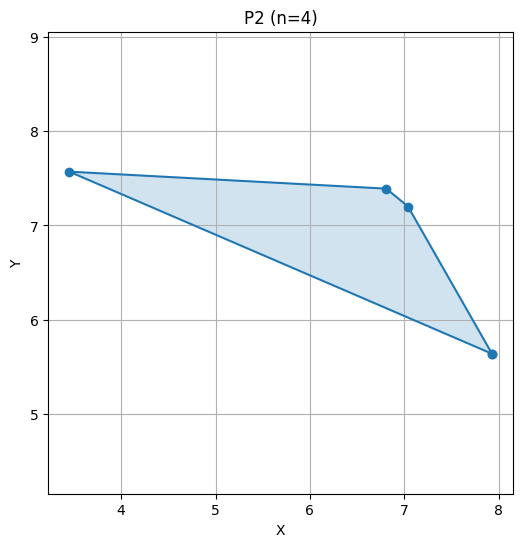

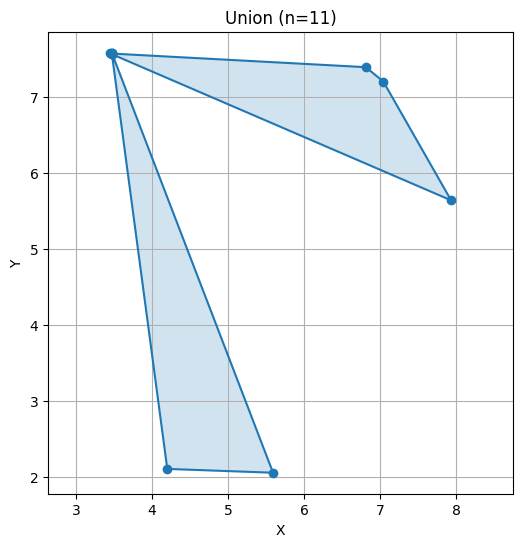

<Figure size 1800x600 with 0 Axes>

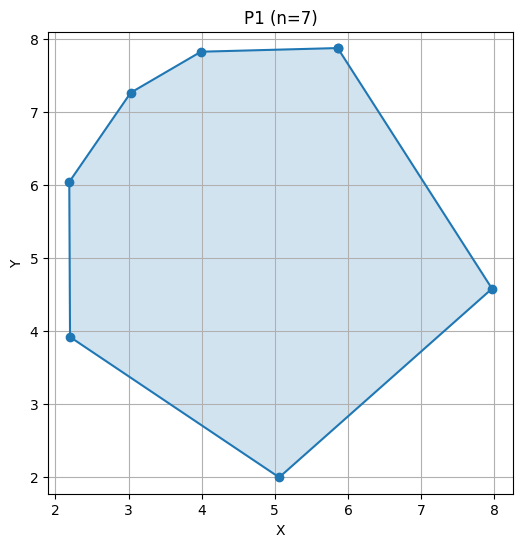

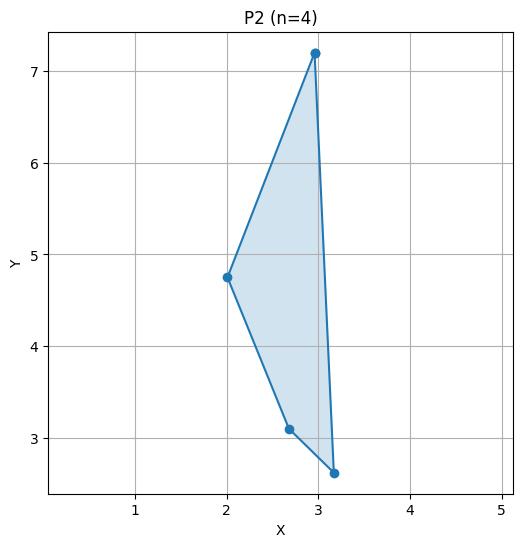

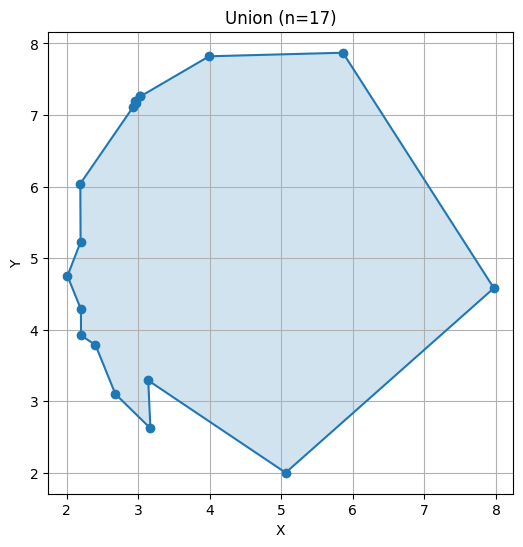

In [12]:
reader = PolygonSentenceReader(
    batch_size=1,
    max_num_context=5,
    max_seq_len=512,
    min_num_sides=3,
    max_num_sides=8,
)
test_visualise_composition(reader, operation_type='union', num_samples=3)

# Intersection

<Figure size 1800x600 with 0 Axes>

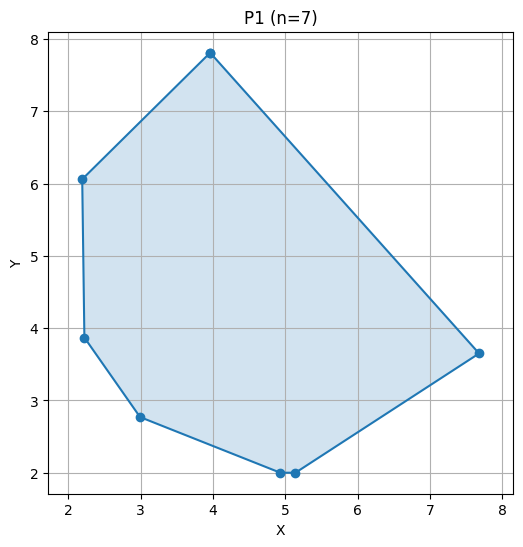

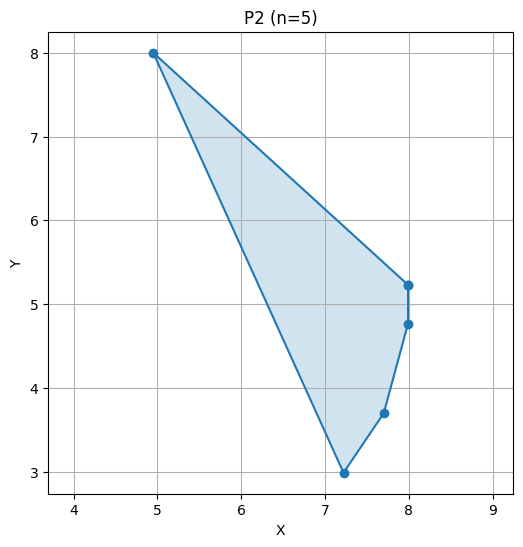

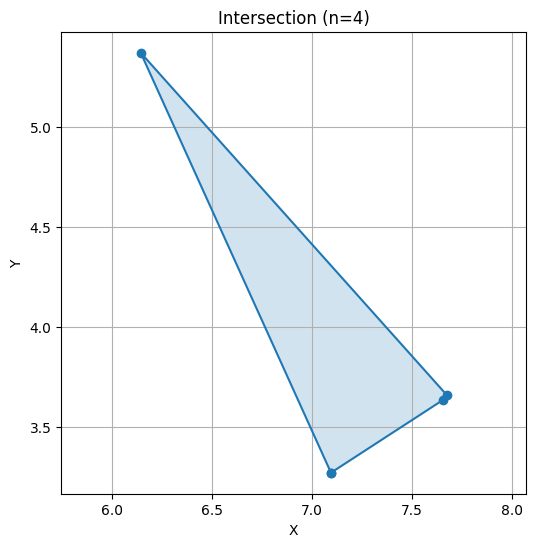

<Figure size 1800x600 with 0 Axes>

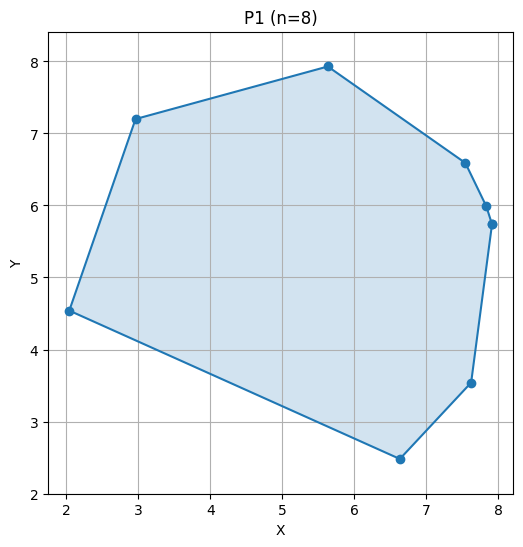

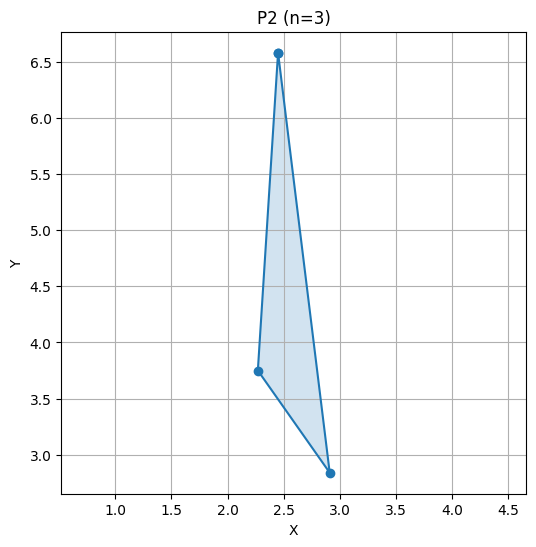

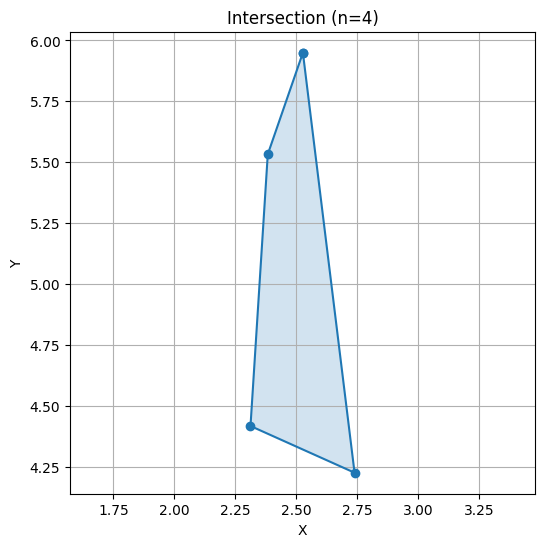

<Figure size 1800x600 with 0 Axes>

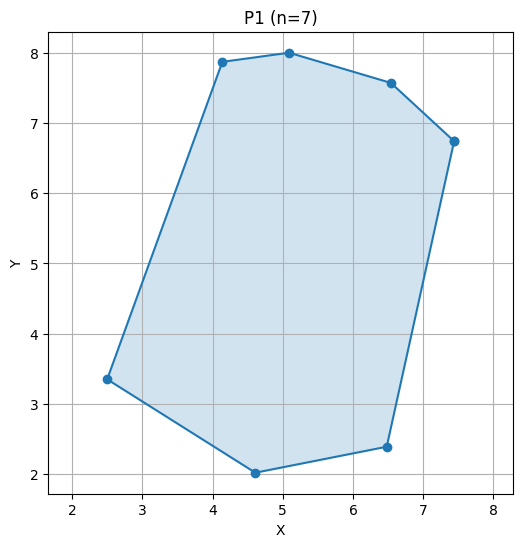

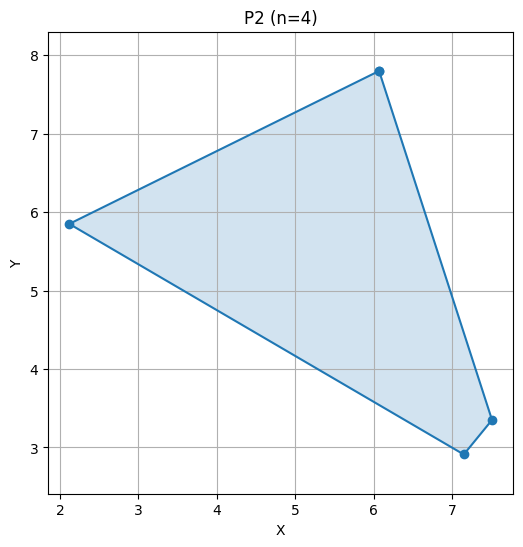

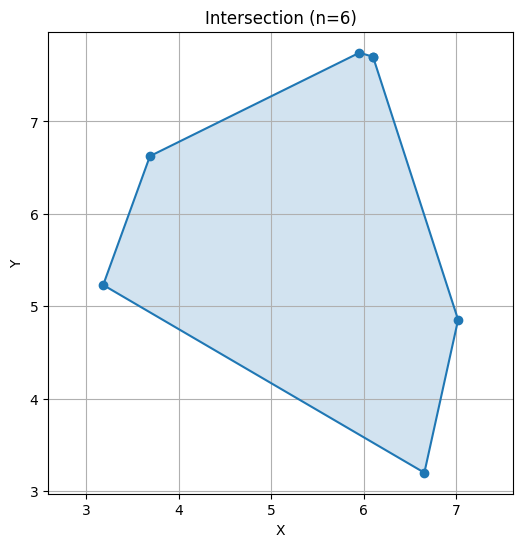

In [13]:
test_visualise_composition(reader, operation_type='intersection', num_samples=3)